# Optimización: Tarea 5
## Oscar Esaú Peralta Rosales

In [0]:
import time

from typing import Callable, Dict, Tuple
from collections import namedtuple

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
def read_histogram(file_name):
    values = []
    with open(file_name) as fp:
        for line in fp:
            values += [int(x) for x in line.split()]
    shape = tuple(values[:3])
    values = np.array(values[3:], dtype=np.float128)
    return values.reshape(shape)


h_0 = read_histogram('H_0.txt')
h_1 = read_histogram('H_1.txt')

In [10]:
h_0

array([[[  45.,  269.,  255.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[   0.,  122.,  423.],
        [   0.,  510., 3922.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,  840.],
        [   0.,    0.,  504.]]], dtype=float128)

In [11]:
h_1

array([[[8335.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]]], dtype=float128)

In [0]:
img = cv2.imread('rose.png')

(500, 500, 3)


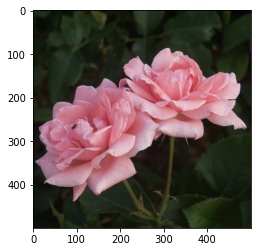

In [13]:
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Funciones a optimizar

In [0]:
def _get_hc_c(h):
    b1, b2, b3 = h.shape
    hc_c = [
          (h[i][j][k], np.array([i,j,k]))
          for i in range(b1)
          for j in range(b2)
          for k in range(b3)
    ]
    return hc_c


hc_c0 = _get_hc_c(h_0)
hc_c1 = _get_hc_c(h_1)


def f(alpha, mu, hc_c, sigma=0.5):
    ans = 0.0
    for h_c, c in hc_c:
        for i in range(alpha.shape[0]):
            h_c -= alpha[i] * np.exp(-(np.linalg.norm(c - mu[i])**2) / (2*sigma**2))
        h_c *= h_c
        ans += h_c
    return ans


def f_grad_alpha(alpha, mu, hc_c, sigma=0.5):
    grad = np.zeros(alpha.shape)

    for k in range(grad.shape[0]):
        sum1 = 0.0
        for h_c, c in hc_c:
            sum2 = np.sum(alpha * np.exp(-(np.linalg.norm(c - mu, axis=1)**2) / (2*sigma**2)))
            e_k = np.exp(-(np.linalg.norm(c - mu[k])**2) / (2*sigma**2))
            sum1 +=  (h_c - sum2) * e_k
        grad[k] = -2 * sum1

    return grad


def f_grad_mu(alpha, mu, hc_c, sigma=0.5):
    grad = np.zeros(mu.shape)    

    for k in range(grad.shape[0]):
        sum1 = 0.0
        for h_c, c in hc_c:
            sum2 = np.sum(alpha * np.exp(-(np.linalg.norm(c - mu, axis=1)**2) / (2*sigma**2)))
            e_k = np.exp(-(np.linalg.norm(c - mu[k])**2) / (2*sigma**2))
            sum1 += (h_c - sum2) * (alpha[k] * e_k * (c - mu[k]))
        grad[k] = -2 * sum1 / sigma**2
    
    return grad
    # return grad.reshape((grad.shape[0] * grad.shape[1]))


In [15]:
n = 30
alpha = np.ones(n)
mu = np.ones((n, 3))

f(alpha, mu, hc_c0, sigma=0.5), f(alpha, mu, hc_c1, sigma=0.5)

(16870785.670028522894, 69471987.94772115842)

In [16]:
f_grad_alpha(alpha, mu, hc_c0, sigma=0.5), f_grad_alpha(alpha, mu, hc_c1, sigma=0.5)

(array([-2107.85860956, -2107.85860956, -2107.85860956, -2107.85860956,
        -2107.85860956, -2107.85860956, -2107.85860956, -2107.85860956,
        -2107.85860956, -2107.85860956, -2107.85860956, -2107.85860956,
        -2107.85860956, -2107.85860956, -2107.85860956, -2107.85860956,
        -2107.85860956, -2107.85860956, -2107.85860956, -2107.85860956,
        -2107.85860956, -2107.85860956, -2107.85860956, -2107.85860956,
        -2107.85860956, -2107.85860956, -2107.85860956, -2107.85860956,
        -2107.85860956, -2107.85860956]),
 array([25.51731353, 25.51731353, 25.51731353, 25.51731353, 25.51731353,
        25.51731353, 25.51731353, 25.51731353, 25.51731353, 25.51731353,
        25.51731353, 25.51731353, 25.51731353, 25.51731353, 25.51731353,
        25.51731353, 25.51731353, 25.51731353, 25.51731353, 25.51731353,
        25.51731353, 25.51731353, 25.51731353, 25.51731353, 25.51731353,
        25.51731353, 25.51731353, 25.51731353, 25.51731353, 25.51731353]))

In [17]:
f_grad_mu(alpha, mu, hc_c0, sigma=0.5), f_grad_mu(alpha, mu, hc_c1, sigma=0.5)

(array([[  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87.711162  ,   229.43728977, -4445.4996946 ],
        [  -87

## Barzilai Borwein

In [0]:
stop_x = lambda x_k, x_k_next: np.linalg.norm(x_k_next - x_k) / max(np.linalg.norm(x_k), 1.0)
stop_f = lambda f_x_k, f_x_k_next: np.abs(f_x_k_next - f_x_k) / max(np.abs(f_x_k), 1.0)
stop_g = lambda grad_k: np.linalg.norm(grad_k)


def barzilai_borwein(x: np.array,
                     f: Callable[[np.array], np.array],
                     g: Callable[[np.array], np.array],
                     tol_x: float=1e-12,
                     tol_g: float=1e-12,
                     tol_f: float=1e-12,
                     mxitr: int=100,
                     **kwargs):
    Result = namedtuple('Result', 'x_log f_log g_norm_log')

    sigma = kwargs.get('sigma', 0.5)

    # logs
    x_log = [[], []]
    f_log = []
    g_norm_log = [[], []]

    # X
    x_k_prev = [None, None]
    x_k = x;
    x_log[0].append(x_k[0])
    x_log[1].append(x_k[1])

    # gradient
    g_k_prev = [None, None]
    g_k = [g[0](*x_k, **kwargs.get('g_kwargs', {})), g[1](*x_k, **kwargs.get('g_kwargs', {}))]
    g_norm_log[0].append(np.linalg.norm(g_k[0]))
    g_norm_log[1].append(np.linalg.norm(g_k[1]))

    # f
    f_k = f(*x_k, **kwargs.get('f_kwargs', {}))
    f_log.append(f_k)

    k = 0
    alpha_k = kwargs.get('alpha', 1e-2)
    
    while np.linalg.norm(g_k[0]) > tol_g or np.linalg.norm(g_k[1]) > tol_g and k < mxitr:
        case = k % 2
        if k < 2:
            print('k', k)
            pass
        else:
            s_k1 = x_k[case] - x_k_prev[case]
            y_k1 = g_k[case] - g_k_prev[case]
            if len(y_k1.shape) != 1:
                s_k1 = s_k1.reshape(s_k1.shape[0], s_k1.shape[1])
                y_k1 = y_k1.reshape(y_k1.shape[0], y_k1.shape[1])
            alpha_k = np.dot(s_k1, y_k1) / np.dot(y_k1, y_k1)
            # print('alpha k', alpha_k)
        
        x_k_prev[case] = x_k[case]
        x_k[case] = x_k_prev[case] - alpha_k * g_k[case]
        x_log[case].append(x_k[case])

        g_k_prev[case] = g_k[case]
        g_k[case] = g[case](*x_k, **kwargs.get('g_kwargs', {}))
        # print(g_k[case])
        g_norm_log[case].append(np.linalg.norm(g_k[case]))

        f_k = f(*x_k, **kwargs.get('f_kwargs', {}))
        print(f_k)
        f_log.append(f_k)

        # Stop criteria
        if stop_x(x_log[0][-2], x_log[0][-1]) <= tol_x and stop_x(x_log[1][-2], x_log[1][-1]) <= tol_x:
            break
        if stop_f(f_log[-2], f_log[-1]) <= tol_f:
            break
        k += 1
    # print(x_log)
    return Result(x_log, f_log, g_norm_log)


k 0
16929095.990158912615
k 1
16929095.990158912615
[0.0, 2926.9721252847016]
f_log 0 [16935024.0, 16929095.990158912615, 16929095.990158912615]


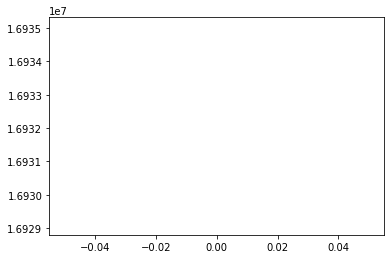

In [59]:
n = 30
alpha = np.zeros(n, dtype=np.float128)
mu = np.zeros((n, 3), dtype=np.float128)

X = [alpha, mu]

params = {
    'x': X,
    'f': f,
    'f_kwargs': {
        'hc_c': hc_c0,
        'sigma': 0.5
    },
    'g': [f_grad_alpha, f_grad_mu],
    'g_kwargs': {
        'hc_c': hc_c0,
        'sigma': 0.5
    },
    'hist': hc_c0,
    'tol_x': 1e-12,
    'tol_f': 1e-12,
    'tol_g': 1e-12,
    'alpha': 1e-2,
    'mxitr': 10000
}

ans = barzilai_borwein(**params)

# print("iters: %d" % len(ans.x_log))
# print("g norm", ans.g_norm_log[0][-1], ans.g_norm_log[1][-1] )
# print("f norm", ans.f_log[-1])

print(ans.g_norm_log[1])

# plt.plot(ans.g_norm_log)
print('f_log 0', ans.f_log)
plt.plot(ans.f_log[0])
plt.plot(ans.f_log[1])